# 2. Análisis de Patrones de las siguiente variables en desastres hidrológicos: Magnitud - Daños Económicos - Muertes  (2010-2024).

 **0. Conexión con Google Drive, para poder leer sus archivos almacenados y posteriormente guardar en dicha unidad aquella nueva información se genere**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 0. Lectura de la base de datos original, generada apartir del notebook que le antecede, periodo de tiempo 2010-2024
import pandas as pd

bd2 = pd.read_excel("/content/drive/MyDrive/Base de datos/1database_procesada_2010_2024.xlsx")


:**I. Filtrado especifico y limpiado de las variables a relacionar entre sí: (Pre-procesado de datos)**

In [5]:
# 1. Lectura de la base de datos limpia, almacenada desde otra variable a trabajarse de forma Principal.
import pandas as pd

bd = pd.read_excel("/content/drive/MyDrive/Base de datos/database_2010_2024.xlsx")


In [6]:
# 0.1 Filtrado y modificado de la información de la base de datos original, al formato con el cual se pretende trabajar (columnas, etiquetas, índice)
# (Para este caso en particular no se realiza limpiado de filas con valores NaN)


bd2 = bd2.rename(columns = {"Start Year":"Año","Start Month":"Mes", "Start Day":"Dia", "Country":"País", "Total Damage ('000 US$)":"Daños Económicos", "Magnitude":"Magnitud", "Total Deaths":"Muertes Totales", "Disaster Subgroup":"Clasificación"})

bd2 = bd2.drop(columns=["Unnamed: 0"])                    # Columna residual que especifica los índices por defecto del excel

bd2.index=range(len(bd2))                                 # Reestablecer el número que le corresponde al indice del nuevo df

bd2

,Año,Mes,Dia,País,Region,Location,Magnitud,Clasificación,Daños Económicos,Muertes Totales
0,2010,1.0,NaN,Burundi,Africa,"Gatumba village (Mutimbuzi district, Bujumbura...",NaN,Hydrological,NaN,NaN
1,2010,1.0,4.0,Pakistan,Asia,Administrative unit not available district (Ja...,NaN,Hydrological,18000.0,19.0
2,2010,1.0,14.0,Philippines,Asia,"Jabonga, Las Nieves, Santiago areas (Agusan de...",NaN,Hydrological,22.0,2.0
3,2010,1.0,18.0,Egypt,Africa,"El Arish 1 district (North Sinai province), Ra...",226100.0,Hydrological,NaN,12.0
4,2010,1.0,19.0,Israel,Asia,Southern District province,NaN,Hydrological,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...
2680,2024,10.0,4.0,India,Asia,Meghalaya,NaN,Hydrological,NaN,15.0
2681,2024,10.0,17.0,France,Europe,"Rhône, Loire, Haute-Loire, Lozère, Ardèche, Al...",NaN,Hydrological,NaN,NaN
2682,2024,9.0,23.0,Sierra Leone,Africa,Bumbuna dam in Bumbuna town (Tonkolili Distric...,NaN,Hydrological,NaN,NaN
2683,2024,10.0,22.0,South Africa,Africa,Eastern Cape province,NaN,Hydrological,NaN,10.0


In [7]:
# 1.1 Filtrado y modificado de la información, Variable Principal, al formato con el cual se pretende trabajar (filas, columnas, etiquetas, índice)
# (Para este caso se limpiarán todas las filas de las columnas que no coincidan por tener valores no NaN y así trabajar de forma lineal o uniforme
# con los valores de las variables de estudio)

import datetime

bd = bd.rename(columns = {"Start Year":"Año","Start Month":"Mes", "Start Day":"Dia", "Country":"País", "Total Damage ('000 US$)":"Daños Económicos", "Magnitude":"Magnitud", "Total Deaths":"Muertes Totales", "Disaster Subgroup":"Clasificación"})

bd = bd.dropna()

bd['Dia'] = bd['Dia'].astype(int)                                                           # Los valores por defecto son float, se convierten a entero para poder hacer uso de datetime

bd['Muertes Totales'] = bd['Muertes Totales'].astype(int)                                   # Cambiar de valor float a entero de muertes, para su visualización adecuada

bd["Fecha"] = pd.to_datetime(bd[["Año", "Mes", "Dia"]].astype(str).agg('-'.join, axis=1))   # Transformar y unir a una sola columna el formato de fechas original con datetime.

bd = bd.drop(columns=["Año", "Mes", "Dia", "Unnamed: 0"])                                   # Eliminar las columnas sobrantes del proceso anterior.

bd.index=range(len(bd))                                                                     # restablecer el valor del indice original por el de la cantidad que corresponde a cada elemento de df

bd

,País,Region,Location,Magnitud,Clasificación,Daños Económicos,Muertes Totales,Fecha
0,Mexico,Americas,"Distrito Federal, Mexico city, Michoacan provi...",122621.00,Hydrological,16000.0,41,2010-01-26
1,Portugal,Europe,Funchal district (Ilha Da Madera province),483.00,Hydrological,1350000.0,43,2010-02-20
2,Colombia,Americas,"Sucre, Bolivar, Cordoba, Antioquia, Atlantico,...",1140146.00,Hydrological,1000000.0,418,2010-04-06
3,Sri Lanka,Asia,"Galle, Matara districts (Southern province), R...",19210.00,Hydrological,105000.0,28,2010-05-14
4,France,Europe,"Draguignan, Les Arcs, Figanières, Roquebrune s...",7700.00,Hydrological,1500000.0,25,2010-06-15
...,...,...,...,...,...,...,...,...
170,Kenya,Africa,"West Pokot, Elgeyo Marakwet, Kisumu, Homabay, ...",154389.90,Hydrological,10000.0,285,2020-04-18
171,Yemen,Asia,"Aden, Lahj, Taiz, Ad Dali’, Abyan, Hadramawt g...",18949.28,Hydrological,10000.0,10,2020-04-15
172,Ukraine,Europe,Verkhovyna District (Ivano-Frankivsk); Vyzhnyt...,33791.16,Hydrological,153861.0,3,2020-06-22
173,Japan,Asia,"Kumamoto Prefecture, Yatsushiro, and Hitoyoshi...",28547.82,Hydrological,5800000.0,82,2020-06-29


**II. Procesado de datos:**

In [8]:
# Los 2 DataFrame anteriormente limpiados, se generarán documentos .excels para continuar con el análisis de los datos en el siguiente notebook (parte 3)

bd.to_excel("magnitud-dañosEco-Deaths.xlsx")

bd2.to_excel("filtradodelasvariablesgeneral.xlsx")

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

bd.describe()

,Magnitud,Daños Económicos,Muertes Totales,Fecha
count,175.00,175.00,175.00,175
mean,"167,883.22","1,376,486.54",116.55,2014-05-29 12:28:48
min,483.00,176.00,1.00,2010-01-26 00:00:00
25%,"20,269.00","22,000.00",9.00,2012-01-27 00:00:00
50%,"55,138.95","120,000.00",32.00,2013-12-27 00:00:00
75%,"154,581.55","600,000.00",67.00,2016-07-08 12:00:00
max,"2,643,786.00","40,000,000.00","6,054.00",2021-07-12 00:00:00
std,"318,254.76","4,844,264.63",489.56,NaN


**2. Interpretación de la estadística descriptiva de los datos obtenidos de la base datos pre-procesada. Es decir, sólo de aquello que puede estudiarse en cojunto respecto a la magnitud, daños económicos y muertes totales:**


**A. Magnitud:** Su valor se lee en kilometros cuadrados de afectaciones a áreas
por inundaciones y "movimientos en masa", como únicos desastres registrados en la categoria de hidrológicos. En la parte de movimiento en masa, se pueden categorizar como evento de deslizamientos de tierra, derrumbes o flujo de escombros.

**En la lectura de los resultados de las estadisticas para magnitud:** se tiene que el valor mínimo de 483 km^2, lo cual indica a priori un evento de magnitud relativamente bajo, en comparación al resto. Aunque no por ello menos importante, como breve detalle esta eventualidad sucedio en Portugal y dejo una cifra de muertes de 43 personas, además de un daño económico de 1.350.000$ (millones de dólares), el cual se desglosará más adelante donde se argumentará más sobre éste caso en particular.

**En el valor de la media** 167.883,22  km^2, sugiere que en general los eventos registrados tienden a ser de magnitud moderada a alta dependiendo de donde sea su afectacción regular. Para hacernos una idea se tiene por ejemplo que el área de Italia es de 302.073 km^2, por lo que es una consideración bastante significativa a los sitios que son más vulnerables a éstos fenómenos de tal magnitud, resultado de mayor, menor o masivos los daños en comparación.

**El mayor valor** de 2.643.786,00 km^2, por si sólo hace enfasis en representar un tipo de evento muy en particular, es una magnitud extremadamente alta y catastrófica si se ve particularizada. Por ejemplo, Argentina mide alrededor de 2.780.400 km^2, siendo catastrófico incluso para China, que fue el sitio de este incidente, aunque dejando una cantidad de bajas de 91 personas, muy por debajo de lo que pudo haber sido en cualquier otra sitio, aunque dejando perdida economicas de 1.200.000$ (millones de dólares). China mide aprpximadamente 9.596.900 km^2, pero logra apreciarse la influencia de otros factores externos para la obtensión de  estos resultados positivos para su población a desastres tan masivos, aunque no tanto a nivel económico.

**Desviación estandar** de 318.254,76 km^2, es significativamente alta recapitulando lo anterior, es decir, refleja una gran dispersión en estos valores, y que hay una amplia variedad de eventos desde los de baja magnitud hasta los de magnitud excepcional.


---




**B. Daños Económicos:** Estos datos se miden o leen en miles de dolares, que de la mano con la ubicación exacta del incidente, proporcionará información sobre la cantidad "real" de daños a ecosistemas e infraestructuras. La "reparación" de esto daños, tiene que salir de un presupuesto especial, para reconstrucciones y arreglos que no siempre será posible o factibles. Por lo que la toma de previsiones deben considerarse mucho antes para alivianar tales efectos.  

**Comenzando con la lectura de las estadisticas para Daños Económicos:** Se tiene que el valor más bajo registrado es 176$ (dólares), indicando por si sólo que en tal evento tuvo un impacto económico extremadamente bajo en comparación al resto de zonas. Sin embargo, ésto no es un indicativo preciso para evaluar el verdadero daño económico sufrido, este país es Burkina Faso de "Sub-Saharan Africa", su ubicación es un área que vive en condiciones económicas donde la mayor parte de la población cuentan con ingresos bajos e incluso viven en pobreza y que bajo esas condiciones esa cantidad de pérdidas puede representar una valuación grande de recursos para dicha comunidad.

**La media de** 1.376.486,54$ (milones de dólares) habla de que general, los eventos registrados tienden a ser de impacto bastante alto o incluso masivos, como lo anteriormente recapitulado para Burkina y que puede aplicar en otra serie de casos, por lo que variará drasticamente. Aunque estos son cantidades de por sí elevadas, por lo que no deben tomarse a la ligera a la hora de conocer el nivel de afectacción sufrido.

**El mayor valor de** 40.000.000,00$, muestra una catastrofe devastadadora a gran escala, directamente sucedido en Thailandia en "South-eastern Asia", que no sólo se considera un impacto económico bastante alto en lo que se refiere el desarrollo de este país, sino que este desastre abarcó tanto área urbanas, como rurales, impactando en la vida de muchas personas incluyendo comunidades más vulnerables que dependían de agricultura y otros medios de vida.

 Por lo que la recuperación puede ser un desafio que a largo plazo, ya que no todo pudiese haber sido recuperado totalmente, generando otros tipo de perdida a mediano plazo, y si tomamos en cuenta la magnitud fue de sólo 96.785 km^2, que como se pudo apreciar, no se acerca en nada a la cantidad máxima de esa variable, y que para el valor de este caso, se clasifica como daño moderado o alto. Pero que resultó ser extremadamente peor de lo que se pudo estimar, tomando de referencia sólo ese dato. Además de una baja de 813 personas.

**La desviación estándar de** 4.844.264,63$ realmente es alta para cualquier sitio, lo que refleja una enorme variabilidad en los valores de daños económicos, y esto implica que hay una amplia gama de eventos, que nuevamente independiente de la cantidad, es lo sufrido para donde haya sido el desastre.



---

**C. Muertes Totales:** se trata de la cantidad total de bajas humanas por evento, que como ya se ha estudiado varía tanto para eventos de magnitud muy alta, moderada y baja, pudiendo ser de mayor o de menor impacto dependiendo de otros factores, como podría ser el nivel de preparación del país en cuestión a este tipo de eventos a lo largo del tiempo. Pero ese aspecto pasa a ser un estudio a parte, del contexto y todo lo que contribuye a que eso sea así o no, para cada país de interés y que también contribuye a la visualización precisa de éstos datos, para análisis en mayor profundidad.

**La lectura de la estadistica para Muertes:** El valor mínimo es de 1 (uno). para este caso no se cuenta con datos en magnitud en km^2 del suceso, pero los daños económicos fueron de 15.480,00$ y el incidente tuvo lugar en Filipinas. En lo que respecta daño econónomico, para esa ubicación especifica se trata de una zona de ingresos medios-bajos, por lo que que dicha cantidad pudo representar una carga importante para las familias y autoridades, en asistencia y recuperación. Esto nuevamente dá a entender que una parte no es equivalente a la otra (referente a variables), y todavia menos tomando el cuenta el sitio, para conocer su impacto real.

**La media de** 116, este valor sugierre que para el promedio de bajas humanas se tiene un impacto humano a analizarse mejor, para cada caso en particular y así tomar previsiones para que esa cifra sea todavia menor.

**EL valor máximo de** 6.054 personas, es una cantidad bastante alarmante de por sí, más todavia si se toma en cuenta que para ese incidente fue de una magnitud de 131.743,4 km^2, sumando los daños económicos que ascienden a 1.100.000,00$. Esto tuvo lugar en la India, la cantidad de daños es evidentemente un golpe devastador para las familias y economía de esas regiones, su ubicación es de alcance geográfico extenso, afectando ecosistemas, que van desde área rurales, agrícolas hasta centro urbanos. Por lo que en éste es uno de los casos que puede evaluarse que la magnitud, daños económicos y muertes refleja una realidad o relación lineal.  

**La desviación estandar de** 489 es alta, reflejando una gran variabilidad en el número de muertes, nuevamente esto implica que hay una amplia gama de eventos, desde aquellos con pocas victimas, hasta otros un número de muertes devastador.


---






En resumen, éste breve análisis de los datos estadisticos, muestra que el conjunto de información, registra una gran diversidad de eventos con una amplia variación en lo que respecta magnitud, daños económicos y muertes totales. Y no sólo en el aspecto de los valores, sino en el impacto objetivo que vivenció en el país, con todo lo que dispone o no para hacerle frente. Por lo que no siempre los números podrán reflejar la realidad en concreto, igualemente frente otros números y desastres.

**III. Visualización de los datos: Análisis de datos:**

**3.1 Gráfica de cantidad de datos para cada variable de estudio, de la base de datos, sin el pre-procesado (Magnitud, Daños Económicos, Muertes)**

In [20]:
magnitud = bd2["Magnitud"]
daños = bd2["Daños Económicos"]
muertes = bd2["Muertes Totales"]
fecha = bd2['Año']

Cantidad de datos válidos para magnitud: 506


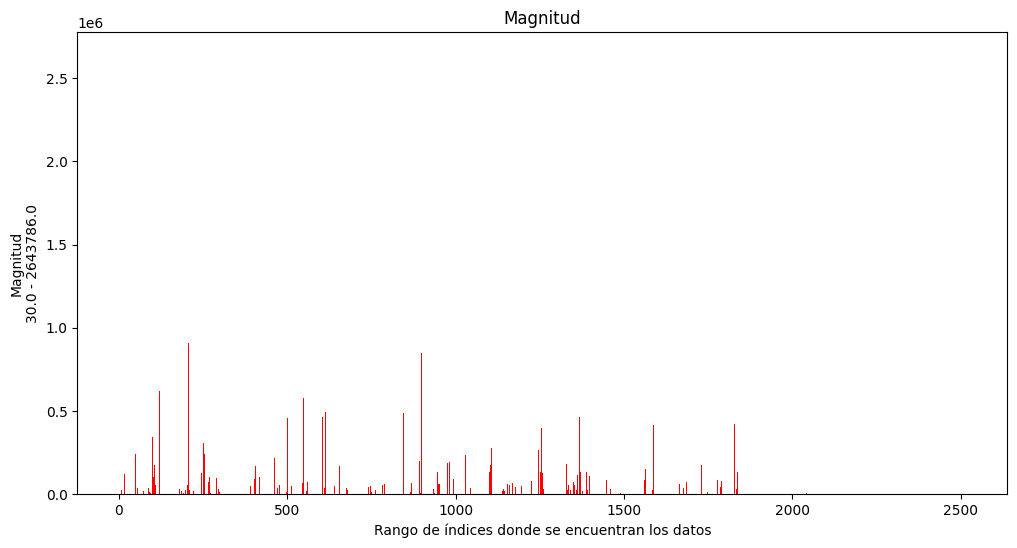

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(12, 6))
print(f"Cantidad de datos válidos para magnitud: {magnitud.count()}")
ax.bar(range(len(magnitud)), magnitud)
ax.set_title('Magnitud')
ax.set_xlabel('Rango de índices donde se encuentran los datos')
ax.set_ylabel(f'Magnitud\n{magnitud.min()} - {magnitud.max()}')
ax.bar(range(len(magnitud)), magnitud, color='red')
plt.show()


Cantidad de datos válidos para Daños Econónmicos: 706


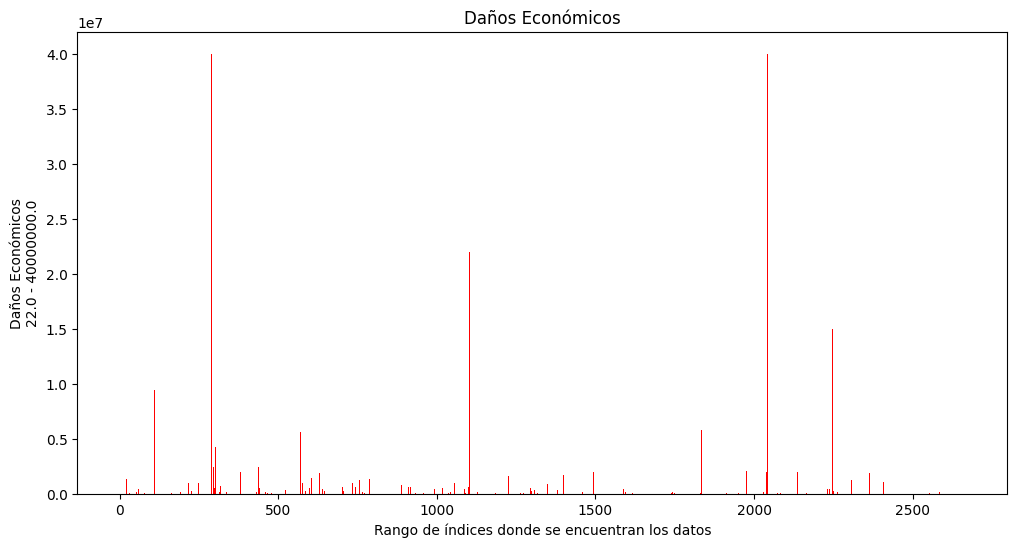

In [33]:
# Gráfico de Daños Económicos
fig, ax = plt.subplots(figsize=(12, 6))
print(f"Cantidad de datos válidos para Daños Econónmicos: {daños.count()}")
ax.bar(range(len(daños)), daños)
ax.set_title('Daños Económicos')
ax.set_xlabel('Rango de índices donde se encuentran los datos')
ax.set_ylabel(f'Daños Económicos\n{daños.min()} - {daños.max()}')
ax.bar(range(len(daños)), daños, color='red')
plt.show()

Cantidad de datos válidos para Muertes totales: 2053


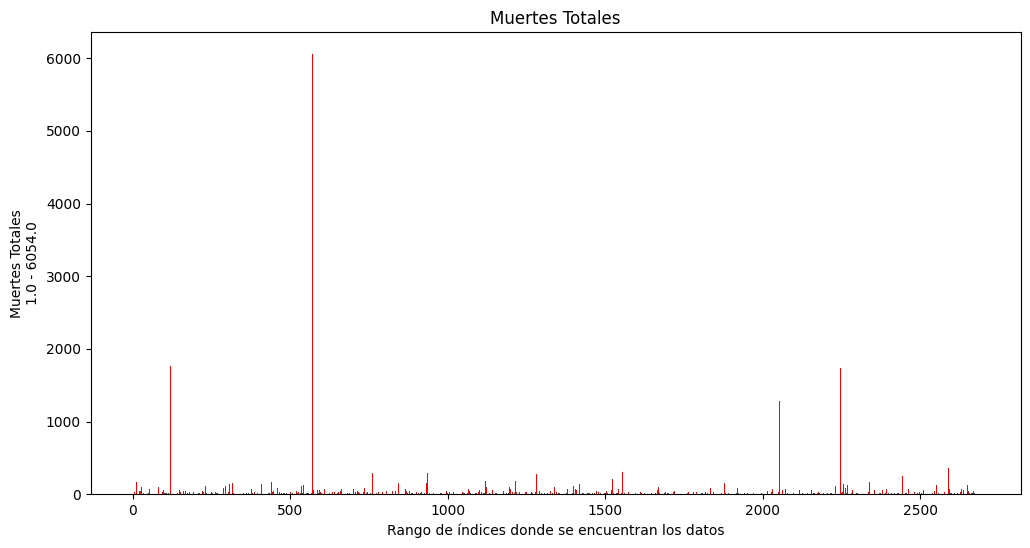

In [34]:
# Gráfico de Muertes Totales
fig, ax = plt.subplots(figsize=(12, 6))
print(f"Cantidad de datos válidos para Muertes totales: {muertes.count()}")
ax.bar(range(len(muertes)), muertes)
ax.set_title('Muertes Totales')
ax.set_xlabel('Rango de índices donde se encuentran los datos')
ax.set_ylabel(f'Muertes Totales\n{muertes.min()} - {muertes.max()}')
ax.bar(range(len(muertes)), muertes, color='red')
plt.show()

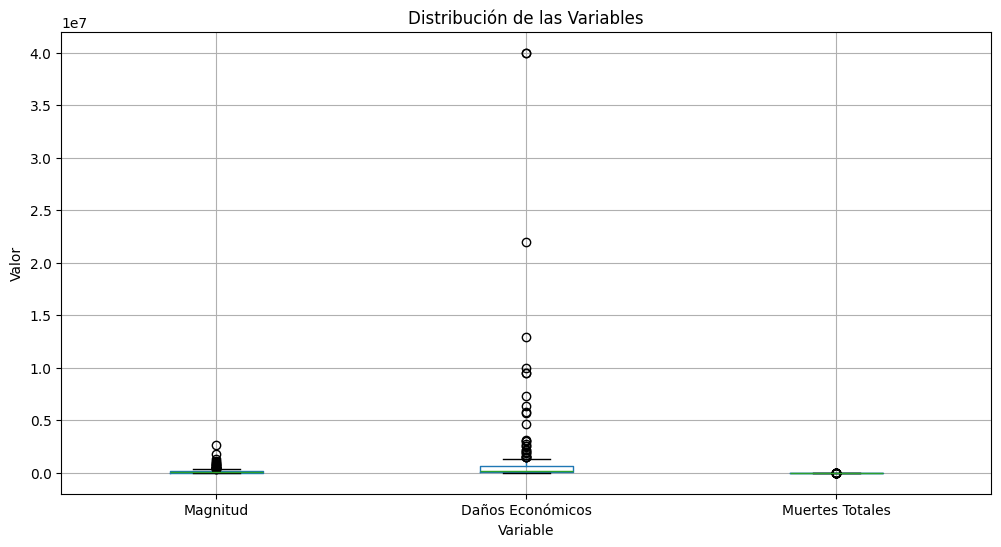

In [16]:
plt.figure(figsize=(12, 6))
bd.boxplot(column=['Magnitud', 'Daños Económicos', 'Muertes Totales'])
plt.title('Distribución de las Variables')
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.show()

**3.1 Analisis de Gráfica General de datos:**

Previamente antes del limpiado de datos, podemos observar que las filas de las 3 columnas de estudio (Magnitud - Daños Económicos, Muertes), existe un gran disparidad de datos a evaluar entre sí (de forma lineal). Por lo que es importante conocer la cantidad de datos que fueron registrados para cada variable predeterminadamente, desde la base de datos original. Y de cuanto se dispondrán una vez pre-procesados, para tener en cuenta también impacto que supone la nueva información a estudiar.

La presición de este estudio se encuentra determianda por la uniformidad de los datos de éstas variables, no puede hacerse un estudio para conocer su impacto y comprender las previsiones que deben tomarse ante un desastre si hay datos nulos. Después del limpiado de datos hace una gran diferencia, la cantidad de datos que se tenia previsto trabajar vs la cantidad a trabajar. Si todos estos datos estuvieran completos sería alrededor de 2.053 filas, pero al ver tantos datos nulos entre esas 3 columnas, ésta cantidad disminuye a 175 filas, pero con datos en todas las filas para las variables a estudiarse.

Esto quiere decir, que hay muchos datos de estos desastres que podrían haber hecho la diferencia en las conclusiones, ya que son alrededor de 1878 filas faltantes, y no quiere decir esto, que no existieron alrededor de 2.053 desastres, sino que son lo que se nos permite estudiar de acuerdo a esas condiciones y garantizar de esta manera la objetividad de la muestra. Gracias a esto es que pudo conocerse y fundamentarse los resultados de las estadisticas.

En general estas son consideraciones que debe tomarse en cuenta para la continudidad de este estudio o futuros estudios de este tipo, las limitaciones externas que enfrenta se encuentra en la propia muestra a utilizarse (base de datos) y/o desastre en particular de esa base de datos, pudiendo tener o no la cantidad de información esperada.

Además, de la cobertura que nos ofrece la técnología cada día, para poder captar de mejor forma en cada pais, estos sucesos con todos los datos que se necesiten estudiar, y de esta manera mejorar en éste tipo de análisis y personalizarlo a tal punto de generar de forma tangible soluciones a la problematicas que enfrentan las comunidades más vulnerables del mundo y disponerla para que tenga el alcance propuesto.

**3.1.1 Gráfico: Distribución de variables:**

**Magnitud:** La distribución de la magnitud muestra un valor atípico (outlier) con un valor muy alto en comparación al resto de los datos.

**Daños Económicos:** La distribución de los daños económicos presenta un valor atípico, muy por encima del resto de los datos y variablidad, presentando no tanta uniformidad en el resto.

**Muertes Totales:** Se observa una distribución sólo un poco más uniforme, con algunos valores atípicos, se apreciar un valor relativamente alto en comparación con el resto.

**3.2 Gráfica general de la base de datos pre-procesada, de valores máximos registrado de cada variable por año:**

In [52]:
magnitud2 = bd2["Magnitud"]
daños2 = bd2["Daños Económicos"]
muertes2 = bd2["Muertes Totales"]
fecha2 = bd2['Año']

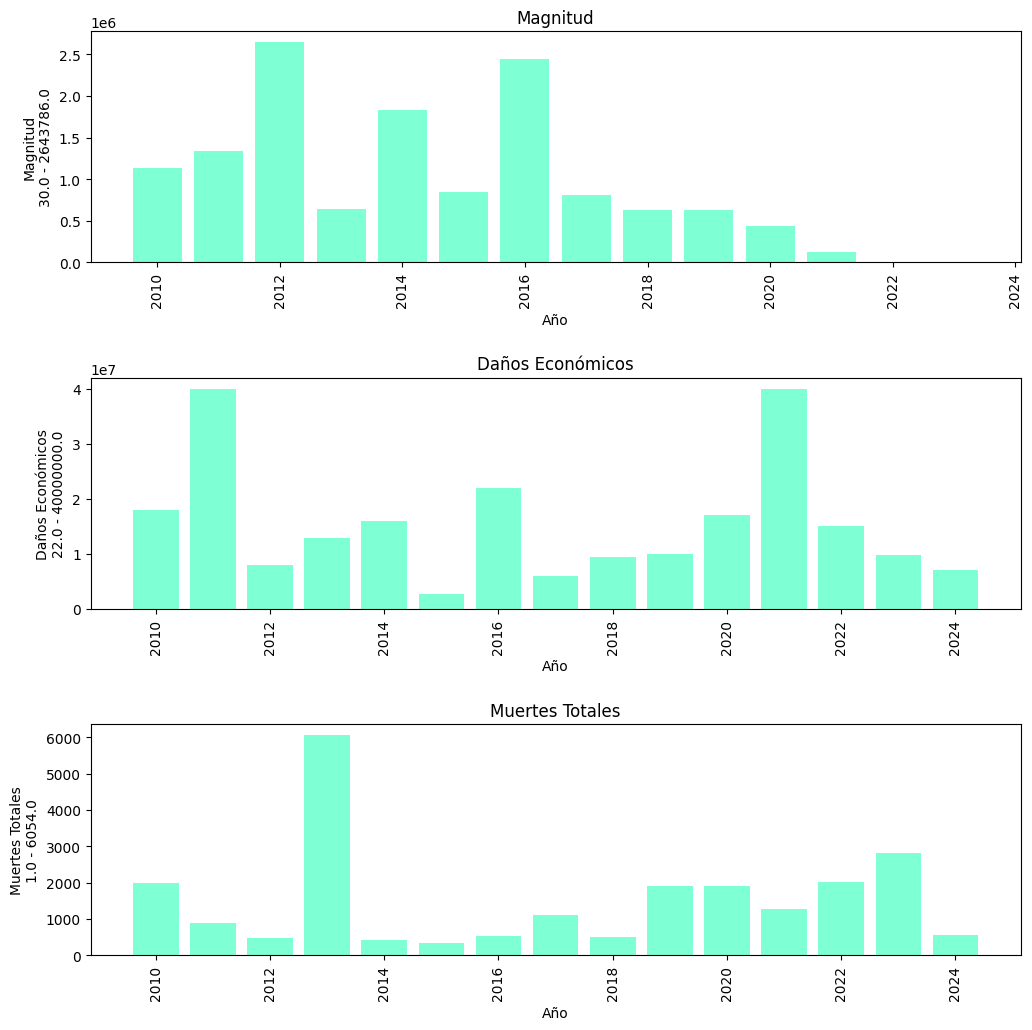

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

# Gráfico de Magnitud
ax1.bar(fecha2, magnitud2)
ax1.set_title('Magnitud')
ax1.set_xlabel('Año')
ax1.set_ylabel(f'Magnitud\n{magnitud2.min()} - {magnitud2.max()}')
ax1.bar(fecha2, magnitud2, color='aquamarine')
ax1.tick_params(axis='x', rotation=90)

# Gráfico de Daños Económicos
ax2.bar(fecha2, daños2)
ax2.set_title('Daños Económicos')
ax2.set_xlabel('Año')
ax2.set_ylabel(f'Daños Económicos\n{daños2.min()} - {daños2.max()}')
ax2.bar(fecha2, daños2, color='aquamarine')
ax2.tick_params(axis='x', rotation=90)

# Gráfico de Muertes Totales
ax3.bar(fecha2, muertes2)
ax3.set_title('Muertes Totales')
ax3.set_xlabel('Año')
ax3.set_ylabel(f'Muertes Totales\n{muertes2.min()} - {muertes2.max()}')
ax3.bar(fecha2, muertes2, color='aquamarine')
ax3.tick_params(axis='x', rotation=90)

# Ajustar el espacio entre los subplots
plt.subplots_adjust(hspace=0.5)

# Mostrar el gráfico
plt.show()


**3.2 Análisis de gráfica de valores máximos de variables por año:**  
Se cuenta con el periodo completo de estudio 2010 - 2024, y se dispone para cada años los valores de la base de datos original, pudiendose apreciar las tendecias especifíca de estás variables a lo largo del tiempo, que tanto fue su aumento o deceso en comparación. Además de ponerlos en la misma línea de relación (uno bajo del otro) respecto a las otras variables, y ver de forma paralela su mutua variación. Y como caso en particular, la cantidad de información que se está perdiendo a partir del 2022 en adelante, en la variable magnitud, con respecto al resto.

Esto se realiza con la intensión de reflejar los valores más altos sin ningun tipo filtros, en las variables que se pretendieron estudiar entre sí, para deducir visualmente como puede afectar la ausencia de información en las conclusiones finales, respecto al hecho de que no se haya podidod registrar completamente los valores más significativos a lo largo de este periodo de tiempo.

Como tal no se hará enfasis en lo que se puede visualizar en las gráficas, por no poder proporcionar la objetividad necesaria que permita poder entrelazar y unificar los resultados. Sin embargo, desde este áspecto, queda como consideración a estudios posteriores que lleguen plantearse la continudad o tomar de referencia los valores y análisis aquí presentes.

**3.3 Gráficos de los patrones que siguen cada una de las variables a lo largo del tiempo 2010 - 2022. Información de la base de datos pre-procesada:**

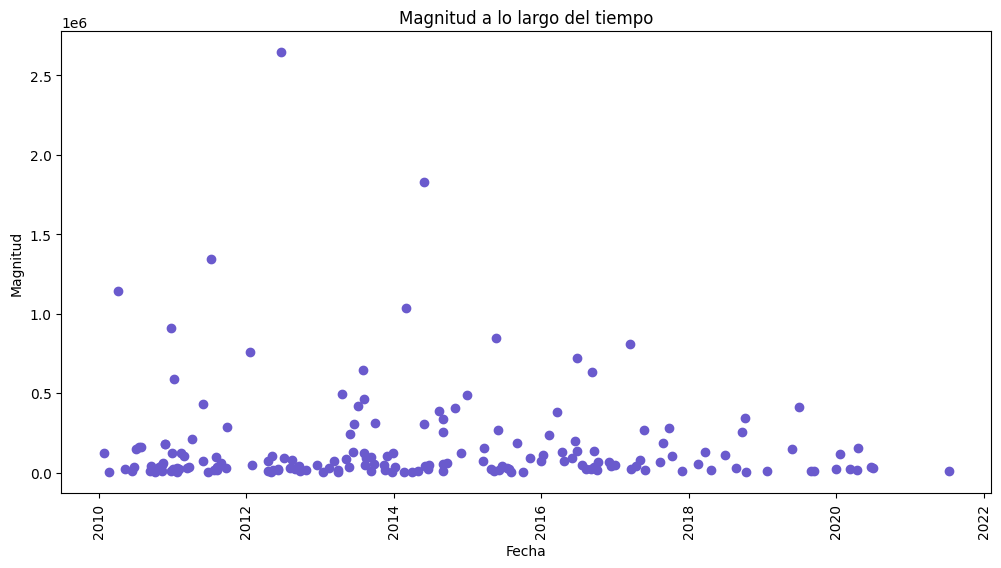

In [49]:
# Gr# Gráfico de patrones o mejor conocido como gráfico de dispersión de Magnitud a lo largo del tiempo
fig, ax4 = plt.subplots(figsize=(12, 6))
ax4.scatter(bd['Fecha'], bd['Magnitud'], c='#6A5ACD')
ax4.set_title('Magnitud a lo largo del tiempo')
ax4.set_xlabel('Fecha')
ax4.set_ylabel('Magnitud')
ax4.tick_params(axis='x', rotation=90)
plt.show()

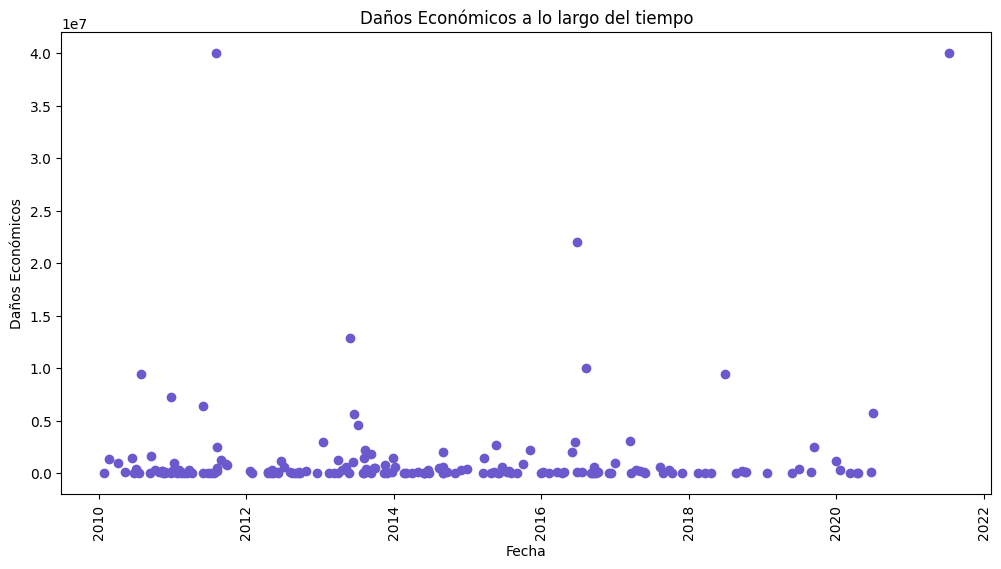

In [50]:
# Gráfico de patrones de Daños Económicos a lo largo del tiempo
fig, ax5 = plt.subplots(figsize=(12, 6))
ax5.scatter(bd['Fecha'], bd['Daños Económicos'], c='#6A5ACD')
ax5.set_title('Daños Económicos a lo largo del tiempo')
ax5.set_xlabel('Fecha')
ax5.set_ylabel('Daños Económicos')
ax5.tick_params(axis='x', rotation=90)
plt.show()

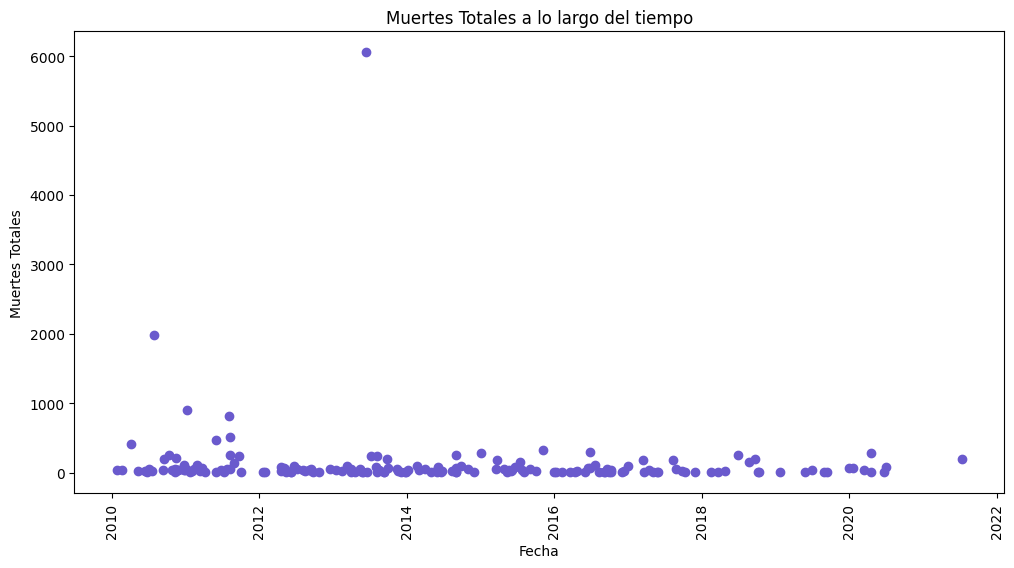

In [51]:
# Gráfico de patrones de Muertes Totales a lo largo del tiempo
fig, ax6 = plt.subplots(figsize=(12, 6))
ax6.scatter(bd['Fecha'], bd['Muertes Totales'], c='#6A5ACD')
ax6.set_title('Muertes Totales a lo largo del tiempo')
ax6.set_xlabel('Fecha')
ax6.set_ylabel('Muertes Totales')
ax6.tick_params(axis='x', rotation=90)
plt.show()

**3.3 Análisis de los patrones que siguen cada una de las variables a lo largo del tiempo, periodo 2010 - 2022:**

Todo la información anterior nos va permite poder comprender y visualizar con mejor base cada uno de los siguientes valores:

 **Magnitud:** Puede observarse bastante dispersión de estos datos, apreciandose como suben y bajan drásticamente poco menos de la mitad de puntos, aunque también como un monton poco más de la mitad, busca de estabilizarse en su parte más baja, aunque no lo suficiente para que estos puntos sigan el mismo nivel entre sí, resultando en un patrón no muy claro de predecir, a pesar de irse cerrando la distacia, pero igual seguir variando y sin estabilizarse de forma notoría. Concretamente con números la mayor magnitud fue de  2.643.786 para el año 2013.

**Daños económicos:** Podría compararse con tener bastante similitud a lo apreciado en magnitud, pero es mas notorio como algunos pocos valores ascienden mucho más, particularmente alrededor de 2012 y 2016. También como predominan los valores bajos y que se estabilizan mucho mejor en la parte inferior, siguiendo una serie o uniformidad bastante cerrada entre sí, aunque ciertas variaciones que visualmente hace notar la discontinuidad. Pero es relevante que tiende a estabilizarse significativamente más en su variación, lo que podría sugerir en general de una tendencia de menor impacto económico.

**Muertes:** Visualmente en comparación a las gráficas anteriores puede notarse mucho más como linealmente en el tiempo los patrones se mantiene en un rango bastante alienado, estabilizandose de forma bastante consistente en tendencias que no varian drasticamente entre sí. Hay un aumento notable en el número de muertes en un único punto (alrededor de 2010) que son de 6054, pero la mayoría de los años registra muy pocas muertes (casi siempre inferior a 1000), es por ello la visualización casi tan predecible de esta variable, indicando tal vez una mejora en la gestión de desastres.  


---




Nuevamente es crucial considerar el contexto de cada uno de estos eventos, se observó en detalle como éstas tres variable, si las tratamos de equiparar, seguimos teniendo variaciones, incluso todavía más drásticas, que imposibilitan poder determinar o predecir el impacto, o si quiera disponer de patrones más claros, sobre como se desarrollan y mantienen estos eventos a lo largo de poco más de una década, con respecto a las diferentes comunidades del mundo, la cuales cada vez están o deberían de estar más preparadas hoy en día, tras muchisimos años de experiencias acumuladas.

 Por lo que el estudio particularizado de las políticas implementadas, la infraestructura y como puede influir la concientización pública sobre la prevención de desastres, tiene que tomarse muy enserio, para que la infornación que arroja este tipo de analisis, pueda aprovecharse de forma presisa y pueda impactar de forma positiva, sobre todo el los sitios que más vulnerables por las diversas condiciones que les engloba.

**3.4 Gráfica de Evolución de las Variables a lo Largo del Tiempo: No requerie de análisis es una forma más explicita de visualizar los anteriores análisis.**

<Figure size 1200x600 with 0 Axes>

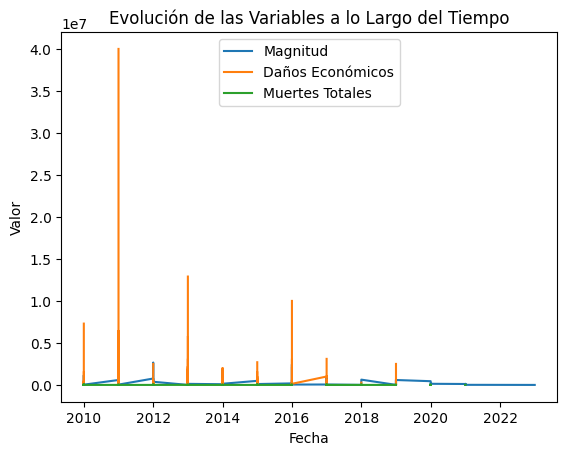

In [ ]:
plt.figure(figsize=(12, 6))
bd2.plot(x='Año', y=['Magnitud', 'Daños Económicos', 'Muertes Totales'], kind='line')
plt.title('Evolución de las Variables a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()